
# STA 208: Homework 1 


### Exercise 1 (Empirical risk minimization) (20 pts, 5 pts each)

Consider Poisson model with rate parameter $\lambda$ which has PMF,
$$
p(y|\lambda) = \frac{\lambda^y}{y!} e^{-\lambda},
$$
where $y = 0,1,\ldots$ is some count variable.
In Poison regression, we model $\lambda = e^{\beta^\top x}$ to obtain $p(y | x,\beta)$.

1. Let the loss function for Poisson regression be $\ell_i(\beta) \propto - \log p(y_i | x_i, \beta)$ for a dataset consisting of predictor variables and count values $\{x_i,y_i\}_{i=1}^n$.  Here $\propto$ means that we disregard any additive terms that are not dependent on $\beta$.  Write an expression for $\ell_i$ and derive its gradient.

**Solution**:
starting with the log density function:
$$
    = -\lambda + yln(\lambda) - y! \Rightarrow yln(\lambda) - \lambda \Rightarrow y\beta^Tx - e^{\beta^Tx}
$$

So, our loss function $\ell_i$ is:

$$
\ell_i(\beta) = e^{\beta^Tx_i} - y_i\beta^Tx_i 
$$

The gradient of $\ell_i(\beta)$:

$$
 \frac{d\ell_i(\beta)}{d\beta} = x_ie^{\beta^Tx_i} - x_iy_i
$$



2. Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.

**Solution**:

Empirical Risk:
$$
R_n(\theta) = \frac{1}{n}\sum^n_{i=1}(e^{\beta^Tx_i} - y_i\beta^Tx_i)
$$

$$
\frac{dR_n(\theta)}{d\beta} = \frac{1}{n}\sum^n_{i=1}\frac{d}{d\beta}(e^{\beta^Tx_i} - y\beta^Tx_i) = \frac{1}{n}\sum^n_{i=1}(x^T_ie^{\beta^Tx_i} - x^T_iy_i)
$$

Now, to show that the empirical risk function $R_n(\theta)$ is concave up (convex), one must show the *second* derivative of empirical risk function is positive:

$$
\frac{d^2R_n(\theta)}{d\beta^2} = \frac{1}{n}\sum^n_{i=1}x^T_ix_ie^{\beta^Tx_i}
$$

The second derivative of the empirical risk function $R_n(\theta)$ with respect to $\beta$ is clearly positive, so the empirical risk function is concave up and therefore a convex function of $\beta$

3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.
4. I have a script to simulate from this model below.  Implement the gradient descent algorithm above and show that with enough data ($n$ large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).

**Solution 3.**

In order to show $F(\hat{\beta}) = \hat{\beta}$, need to show that $R_n(\beta)$ is $ = 0$ at $\hat{\beta}$. Then $F(\hat{\beta}) = \hat{\beta}$

$F_{\eta}(\beta) = \beta - \eta\nabla R_n(\beta)$ 

$$
F_{\eta}(\hat{\beta}) = \hat{\beta} - \eta\nabla R_n(\hat{\beta)}
$$

Since $\hat{\beta}$ minimizes $R_n$, then $\nabla R_n$ evaluated at $\hat{\beta} = 0$ 

$$
\therefore F_\eta(\hat{\beta}) = \hat{\beta} - 0 = \hat{\beta}$$




**Solution 4.**

In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
## Simulate from the Poisson regression model (use y,X)
np.random.seed(2022)
n, p = 1000,20 # 1000 observations, 20 variables
X = np.random.normal(0,1,size = (n,p)) # generation 1000x20 design matrix random samples from standard normal distribution
beta = np.random.normal(0,.2,size = (p)) #general p beta coefficients from normal distribution
lamb = np.exp(X @ beta)
y = np.random.poisson(lamb)

In [123]:

#pass this as argument to the gradient_descent function as intial guess for betas
np.random.seed(1)
initial_betas = np.random.normal(0,.3,size = (20))

def gradient_descent(X,y,beta_vector, learning_parameter = .0001, n_iterations = 100):
    #X is our data matrix
    #y is our vector of observed outcomes
    #beta vector is our initial guess of our beta's
    #learning parameter determines the rate at which the function converges
    #n_iterations determines the number of iterations
    p = len(beta_vector)
    n = len(y) #get n
    #will store sum of squared error
    SSE_list = list()
    betas = list(beta_vector) #initialize list of betas with the initial guess
    

    # er_list = list() #used to store empirical risk for each iteration

    for i in range(n_iterations):

        #generate predictions
        y_hat = np.exp(X @ beta_vector)

        #descend to next beta
        beta_vector = beta_vector - learning_parameter * X.T @ (y_hat - y)

        #calculate the empirical risk with this new beta_vector and add it to the list
        SSE = 1/n * np.sum((y_hat - y)**2)
        SSE_list.append(SSE)

        #append this guess of betas before next iteration
        betas.append(beta_vector)
        

    return(SSE_list,betas)


In [124]:
returned_SSE,returned_betas = gradient_descent(X,y,initial_betas)
print('Initial MSE: {:0.3f}     Final MSE: {:0.3f}'.format(returned_SSE[0],returned_SSE[-1]))

Initial MSE: 49.375     Final MSE: 1.544


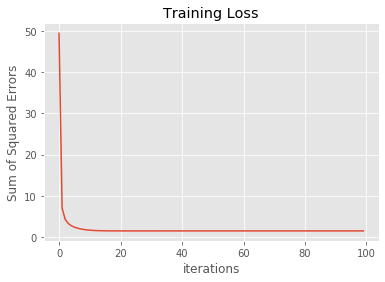

In [125]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(returned_SSE)), returned_SSE) ## fix
plt.title("Training Loss")
plt.xlabel("iterations")
plt.ylabel("Sum of Squared Errors")
plt.show()

Note that as the number of iterations increases, SSE plateus as the estimate for Beta converges.

### Exercise 2 (Regression and OLS) (35 pts, 5 pts each)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that linear regression can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$), assuming that $p < n$ and $X$ is full rank.  Give an expression for $H$ or an algorithm for computing $H$. 


2. Assuming $p < n$ and $X$ is full rank, let $X = U D V^\top$ be the thin singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). 
    - a) Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.   
    - b) Describe a fit method that precomputes these quantities separately
    - c) Use the simulated data $y$ and $X$ in below to find $\hat \beta$ using SVD.
    - d) Call a new data $\tilde X \in \mathbb{R}^{m \times p}$, derive an expression for the predicted $y$ with $\tilde X$ using SVD. 


3. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values on the diagonal, the remainder will be set to 0.  Call this new $p \times p$ matrix $D_r$ ($r < p$).  Then the new coefficient vector is the OLS computed as if the design matrix is modified by $X \gets U D_r V^\top$.  
    - a) Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$? 
    - b) Choose $r = 10$, recompute $\hat\beta$ (call it $\hat\beta_{\text{LowRank}}$) in Question 2-c.

In [126]:
## Simulate from the linear regression model (use y,X)
np.random.seed(2022)
n, p = 100,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
sigma = 1
y = np.random.normal(X @ beta, sigma**2)
beta

array([-0.17336565,  0.30605672, -0.24285072, -0.10336749,  0.23008593,
       -0.09329863,  0.36483006,  0.09802562,  0.10602947,  0.01806207,
       -0.04712799,  0.18924857, -0.45970023,  0.1437104 , -0.44001405,
       -0.21839412,  0.00953289, -0.06680017,  0.0025944 , -0.41108426])

**Solution 1**

Given $Y = XB$, Linear Regression can be understood and presented as an optimization problem, where OLS provides a solution to the optimization problem:

$$
\argmin_{\beta} ||Y - XB||^2_2
$$

$$
\Rightarrow \frac{d}{d\beta}(Y - XB)^T(Y - XB) = \frac{d}{d\beta}(Y^T - B^TX^T)(Y - XB) = \frac{d}{d\beta}[Y^TY - Y^TXB - B^TX^TY + B^TX^TXB]
$$

$$
\Rightarrow -2X^TXB + 2X^TXB = 0 
$$

$$
\Rightarrow \hat{\beta} = (X^TX)^{-1}X^TY
$$

Since $\hat{Y} = X\hat{\beta}$,   

$$ 
\hat{Y} = X(X^TX)^{-1}X^TY
$$

Therefor $X(X^TX)^{-1}X^T = H$, where $H$ is the Hat matrix (a projection matrix), and we are left with:

$$
\hat{Y} = Hy
$$

**Solution 2.**


- **a)**
$\beta = (X^TX)^{-1}X^Ty$, plugging in $UDV^T$ for $X$ and simplying we obtain:

$$
\Rightarrow \beta = VD^{-1}U^Ty
$$

Letting $A = VD^{-1}$ and $b = U^Ty$, it is clear that

$$
\beta = Ab
$$


- **b)**

In [127]:
#define a function that computes A and b to estimate Beta

def svd_ols(X,y):
    U, Sigma_values, V_transpose = np.linalg.svd(X,full_matrices=False) #obtain the 3 matrices for singular valu
    Sigma = np.diag(Sigma_values)
    A = V_transpose.T @ np.linalg.inv(Sigma)
    b = U.T @ y
    beta = A @ b

    return beta

- **c)**

In [128]:
#use simulated data and the function defined in part b) to estimate beta coefficients
beta_hats = svd_ols(X,y)
beta_hats

array([-0.17529727,  0.2409376 , -0.44251575, -0.03407534,  0.23607846,
       -0.2524819 ,  0.50945566,  0.03948573,  0.21520295, -0.03151863,
        0.02374895,  0.13474846, -0.37652418, -0.01026382, -0.33508302,
       -0.04318508,  0.2321108 , -0.20681122, -0.05872932, -0.24552763])

**d)**
$$
Y_{pred} = \tilde{X}\beta
$$

$$
\Rightarrow Y_{pred} = \tilde{X}Ab
$$

$$
\Rightarrow Y_{pred} = \tilde{X}VD^{-1}U^Ty
$$

Noting that $\tilde{X} = UDV^T$ and subsituting we obtain

$$
\Rightarrow Y_{pred} = UDV^TVD^{-1}U^Ty 
$$

$$
\Rightarrow Y_{pred} = UU^Ty
$$


**Solution 3.**
- **a)** This would be an implemention of "economy" SVD (an r-rank approximation):

In [129]:
#modify svd_ols to be for rank_deficient approximations
def svd_ols_lowrank(X,y,r):
    U, Sigma_values, V_transpose = np.linalg.svd(X,full_matrices=False)
    U_r = U[:,0:r] #create a U matrix with r columns as opposed to p columns, of course including all rows
    V_transpose_r = V_transpose[0:r,:]
    Sigma_r = np.diag(Sigma_values[0:r]) #r singular values matrix r x r
    A = V_transpose_r.T @ np.linalg.inv(Sigma_r)
    b = U_r.T @ y
    beta = A @ b

    return beta

In [130]:
#test to see if it works
beta_lowrank= svd_ols_lowrank(X,y,10)
beta_lowrank

array([ 0.03112502, -0.0430854 , -0.16394756,  0.03728632,  0.03755968,
       -0.04653204, -0.04193316,  0.13440484, -0.02375678, -0.02505815,
        0.26185551,  0.02535527, -0.04744292, -0.01710232, -0.03823046,
       -0.01175641,  0.06146285, -0.16952398, -0.01660738, -0.10822824])

In [131]:
def change_rank(X,y,r):
    U, Sigma_values, V_transpose = np.linalg.svd(X,full_matrices=False)
    #take the inverse of the matrix then set p-r columns to 0
    p = len(Sigma_values)
    number_zero_diags = p - r
    #make a sigma matrix and take an inverse of dat bih
    sigma_inverse_values = 1/Sigma_values
    low_rank_values = np.append(sigma_inverse_values[:r],np.zeros(number_zero_diags))

    #define the new Sigma matrix with the correct number of zeros on the diagonal
    sigma_inverse_matrix = np.diag(low_rank_values)

    #produce estimate
    A = V_transpose.T @ sigma_inverse_matrix
    b = U.T @ y
    beta = A @ b

    return beta

In [132]:
change_rank(X,y,10)

array([ 0.03112502, -0.0430854 , -0.16394756,  0.03728632,  0.03755968,
       -0.04653204, -0.04193316,  0.13440484, -0.02375678, -0.02505815,
        0.26185551,  0.02535527, -0.04744292, -0.01710232, -0.03823046,
       -0.01175641,  0.06146285, -0.16952398, -0.01660738, -0.10822824])

### Exercise 3 (Subset selection)  (15 pts)

Recall the subset selection problem with tuning parameter $k$,
$$
\min_{\beta : \| \beta \|_0 \le k}\| y - X \beta \|_2^2,
$$
where $\|\beta\|_0 = \#\{j = 1\,\ldots,p : \beta_j \ne 0 \}$.

Notice that we can write this as 
$$
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2,
$$
where 
${\rm supp}(\beta) = \{j = 1\,\ldots,p : \beta_j \ne 0 \}$ (${\rm supp}(\beta)$ is the support of $\beta$).

1. (5 points) Write the subset selection problem in the following form
$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$
where $P_S$ is a projection.  
2. (10 points) Suppose that we have a nested sequence of models $S_1\subset S_2 \subset \ldots \subset S_p$ such that $|S_k| = k$ ($|S_k|$ is the cardinality of $S_k$, meaning that it contains $k$ variables).  Prove that $$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$ for $k=1,\ldots,p-1$.  What does this tell us about the solution to the subset selection problem and the constraint $|S| \le k$?

(Hint: using the fact that $X^TX$ is positive definite, write $X^TX= VDV^T$)

**Solution 1.**

Note that we can rewrite 
$$
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2,
$$ 

as 

$$
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X(X^TX)^{-1}X^Ty \|_2^2, \Rightarrow 

$$

Noting that $X(X^TX)^{-1}X^T = H$, Simplifying:

$$
\| y - Hy \|_2^2 \Rightarrow Y^T(I - H)^T(I - H)Y 

\Rightarrow Y^T(I^TI - I^TH - H^TI + H^TH)Y \\ \Rightarrow Y^T(I - H)Y
$$

Letting $(I - H)$ be denoted $P_s$ we have
$$
=
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$

**Solution 2.**

Starting from

$$
y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y 
$$
for $k=1,\ldots,p-1$

Note this can be re-written as:

$$
y^T(I - H)_{k}y \ge y^T(I - H)_{k+1}y
$$

Simplifying, this expression can be re-written as:
$$
y^TH_ky \le y^TH_{k+1}y
$$

Recall that we have $\hat{\beta}_k = VD^{-1}_kU^Ty$. Therefore, $H_k = XVD^{-1}_kU^T = UDD^{-1}_kU^T$. Note that $VD^{-1}_kU^T$ was obtained from the expression of $\hat{\beta}_k = VD^{-1}_kU^Ty$.


Substituting our expression for $H_k$ and $H_{k+1}$ we obtain:

$$

y^TUDD^{-1}_kU^Ty \le y^TUDD^{-1}_{k+1}U^Ty

$$


**Note:** It is important to note that $DD_k^{-1}$ is a $p \times p$ Identity matrix with $k$ $1s$ on the diagonal, with the remainder of the $p-k$ columns having $0$ on the diagonal.

Similarly, $DD_{k+1}^{-1}$ is a $p \times p$ Identity matrix with $k + 1$ $1s$ on the diagonal, with the remainder of the $p-(k + 1)$ columns having $0$ on the diagonal.


Simplifying the Left and Right-hand side, the vector and matrix products can be represented as the following:

$$
\sum^k_{j = 1} (\sum^n_{i = 1}y_iu_{ij})^2 \le \sum^{k+1}_{j = 1} (\sum^n_{i = 1}y_iu_{ij})^2 = y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y 
$$ 
for $k=1,\ldots,p-1$

This expression can be understood to represent the fact that the *error* (ie, MSE) for a given model with $k$ parameters, which is a subset of a model with $k+1$ parameters, will *always* be greater than or equal to the error of the model with $k + 1$ parameters.

### Exercise 4 (Ridge, lasso and adaptive lasso) (40 pts, 5 pts each)

For this exercise, it may be helpful to use the `sklearn.linear_model` module.  I have also included a plotting tool for making the lasso path in ESL.

1. Load the training and test data using the script below.  Fit OLS on the training dataset and compute the test error.  Throughout you do not need to compute an intercept but you should normalize the $X$ (divide by the column norms).
2. Ridge regression:
    - a) Train and tune ridge regression using a validation set (choose LOOCV) and compute the test error (square error loss).
    - b) Repeat a) but using K-fold (you can choose $K= 5$ or 10) cross validation, compute the test error. Compare the result to a). Comment on what you found.
3. Fit the lasso path with lars to the data and compute the test error for each returned lasso coefficient.
4. Perform 3 without the lasso modification generating the lars path.  Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.
5. Fit the lasso path with coordinate descent to the data. Compare the lasso path using coordinate descent with the path using lars. Comment on what you found.
6. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.
7. Read this website [click here](https://towardsdatascience.com/an-adaptive-lasso-63afca54b80d). Fit the adaptive lasso method to the data. Compare the test error between the adaptive lasso and lasso for each returned coefficient. Comment on what you found.

**Solution 1.**


In [133]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
with open('hw1.data','rb') as f: #load training and test data
    y_train,X_train,y_test,X_test = pickle.load(f)


X_train_scaled = normalize(X_train, axis = 0)
#combine training and test data for X value and normalize values
# X_all = normalize(np.concatenate((X_train,X_test)))


# #combine all y values and normalize as well
# y_all = np.concatenate((y_train,y_test))

#split X_all into train_and
# X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_all, y_all, test_size= .5)



#fit linear model to training data
linear_model = LinearRegression(fit_intercept=False).fit(X_train_scaled,y = y_train)

#predict y values so can later compute test error
y_hat = linear_model.predict(X_test)

#compute test error
mse = mean_squared_error(y_true=y_test,y_pred=y_hat)
print("the test error (MSE) is:  {}".format(mse))


the test error (MSE) is:  5209.316270857285


**Solution 2.**
- **a)**

In [134]:
#Ridge Regression using leave one out cross-validation
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score,KFold, LeaveOneOut
import pandas as pd
#fit using RidgeCV since it defaults to LOOCV, then calculate MSE
#first define list of hyperparameters 


#fit and calcualte the test error/CV score
# score=cross_val_score(Ridge(),X_all,y_all,cv = LeaveOneOut(), scoring = "neg_mean_squared_error")
# print("Average Cross Validation score:    {}".format(score.mean()))

# ridge_model_loocv = RidgeCV(alphas = hyperparams,scoring = "neg_mean_squared_error").fit(X_all,y_all)


#fit Ridge model with LOOCV
#define LOGSPACE!

ridge_model_loocv = RidgeCV(scoring = "neg_mean_squared_error", fit_intercept=False).fit(X_train_scaled,y_train)

#generate predictions
ridge_predictions = ridge_model_loocv.predict(X_test)

ridge_error = mean_squared_error(y_true=y_test, y_pred = ridge_predictions)
print("Ridge LOOCV MSE:   {}".format(ridge_error))



Ridge LOOCV MSE:   3651.768250548872


- **b)**

In [135]:
#repeating a) using k= 5 and k = 10 fold cross-validation

#first k = 5
#fit using RidgeCV since it defaults to LOOCV, then calculate MSE

# ridge_model_5fold = RidgeCV(cv = 5).fit(X_all,y_all) #fit the model

# #predict using test data 
# y_hat_ridge = ridge_model_5fold.predict(X_test)

# #calculate MSE
# fold5_mse = mean_squared_error(y_true= y_te,y_pred=y_hat_ridge)
# #calculate R2
# fold5_r2 = r2_score(y_true= y_te, y_pred= y_hat_ridge)

# print("MSE using K = 5 Fold CV:  {} ".format(fold5_mse))
# print("R^2 using K = 5 Fold CV:  {} ".format(fold5_r2))

#fit ridge model with training data and do k = 5 fold cross-validation
ridge_5fold = RidgeCV(scoring = "neg_mean_squared_error", cv = 5, fit_intercept = False).fit(X_train_scaled,y_train)

#generate predictions
fold5_predictions = ridge_5fold.predict(X_test)

#calculate mse
mse = mean_squared_error(y_pred = fold5_predictions, y_true = y_test)

print("K = 5 Fold CV Test Error (MSE):   {}".format(mse))



K = 5 Fold CV Test Error (MSE):   3651.768250548835


In [136]:
#fit ridge model with training data
ridge_10fold = RidgeCV(scoring = "neg_mean_squared_error", cv = 10, fit_intercept = False).fit(X_train_scaled,y_train)

#generate predictions
fold10_predictions = ridge_10fold.predict(X_test)

#calculate mse
mse = mean_squared_error(y_pred = fold10_predictions, y_true = y_test)

print("K = 10 Fold CV Test Error (MSE):   {}".format(mse))

K = 10 Fold CV Test Error (MSE):   3651.768250548835


the Ridge regression model produced using using $K = 5$ and $K = 10$ cross-validation *slightly* outperforms the Ridge models fit with LOOCV.

**Solution 3.** 

In [137]:
# Fit the lasso path with lars to the data and compute the test error for each returned lasso coefficient.
from sklearn.linear_model import lars_path
alphas, active, coefs = lars_path(X = X_train_scaled, y = y_train , method = "lasso") 

#generate predictions

n_cols = coefs.shape[1] #going to use this to loop over the columns of the lars_lasso_predictions 
    
for i in range(n_cols): #calculate the test mse for each coefficient and print it
    lars_lasso_predictions = X_test @ coefs[:,i]
    mse = mean_squared_error(y_true=y_test, y_pred = lars_lasso_predictions)
    print("Test MSE for model_{} :     {}".format(i,mse))

Test MSE for model_0 :     6.056548975647524
Test MSE for model_1 :     828.3129970133779
Test MSE for model_2 :     2103.2714325155403
Test MSE for model_3 :     2733.1610924925544
Test MSE for model_4 :     3641.9392653571176
Test MSE for model_5 :     3675.672812814707
Test MSE for model_6 :     3835.698935807265
Test MSE for model_7 :     3870.51477476869
Test MSE for model_8 :     3961.786362646945
Test MSE for model_9 :     3970.7311162693313
Test MSE for model_10 :     3972.218111274531
Test MSE for model_11 :     3973.3567632436834
Test MSE for model_12 :     3975.9204029918583
Test MSE for model_13 :     3976.9030551120677
Test MSE for model_14 :     3991.642025379816
Test MSE for model_15 :     4006.7770984181175
Test MSE for model_16 :     4016.601058201926
Test MSE for model_17 :     4028.933386696341
Test MSE for model_18 :     4072.1553510813574
Test MSE for model_19 :     4091.79072028472
Test MSE for model_20 :     4107.482415143124
Test MSE for model_21 :     4110.1380

In [138]:
def plot_lars(coefs, lines=False, title="Lars Path"):
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines:
        plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')



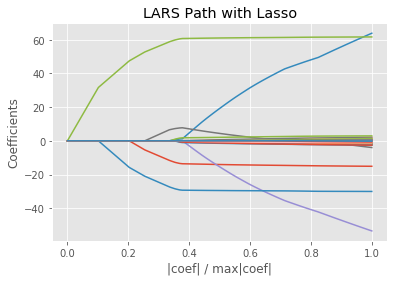

In [139]:
plot_lars(coefs = coefs, title = "LARS Path with Lasso")

**Solution 4.**


In [140]:
#same as q3 but do not specify the method parameter to "lasso"
alphas, active, coefs = lars_path(X = X_train_scaled, y = y_train) 


#generate lars predictions
lars_predictions = X_test @ coefs

n_cols = lars_predictions.shape[1]

for i in range(n_cols): #calculate the test mse for each coefficient and print it
    mse = mean_squared_error(y_true=y_test, y_pred = lars_predictions[:,i])
    print("Test MSE for model_{} :     {}".format(i,mse))



Test MSE for model_0 :     6.056548975647524
Test MSE for model_1 :     828.3129970133779
Test MSE for model_2 :     2103.2714325155403
Test MSE for model_3 :     2733.1610924925544
Test MSE for model_4 :     3641.939265357117
Test MSE for model_5 :     3675.672812814707
Test MSE for model_6 :     3835.698935807265
Test MSE for model_7 :     3870.51477476869
Test MSE for model_8 :     3961.786362646945
Test MSE for model_9 :     3970.7311162693313
Test MSE for model_10 :     3972.218111274531
Test MSE for model_11 :     3973.3567632436834
Test MSE for model_12 :     3975.9204029918587
Test MSE for model_13 :     3976.9030551120677
Test MSE for model_14 :     3991.642025379816
Test MSE for model_15 :     4006.7770984181175
Test MSE for model_16 :     4016.6010582019267
Test MSE for model_17 :     4028.9333866963416
Test MSE for model_18 :     4072.1553510813574
Test MSE for model_19 :     4091.79072028472
Test MSE for model_20 :     4107.482415143124
Test MSE for model_21 :     4110.138

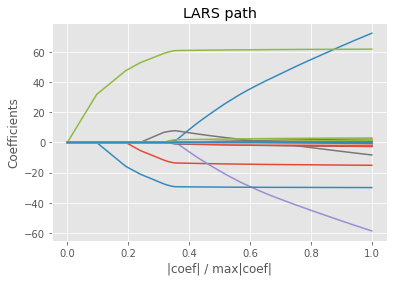

In [141]:
plot_lars(coefs = coefs, title = "LARS path")

The paths are super similar excpet for when the coefficients "hit" 0. In the lars path with lasso the coefficient is effectively dropped from the model by being equal to 0, while in the LARS path if and when a coefficient hits zero it can still stay in the active set. For example, in the "LARS path" plot above, note the gray line where the the coefficient enters the active set, then decreases and hits 0 briefly before becoming a negative coefficient. Meanwhile, the same coefficient in the "LARS path with LASSO" hits 0 and pretty much stays there.

**Solution 5.**

Test MSE for Model_0 :     6.056548975647524
Test MSE for Model_1 :     7.502922757658893
Test MSE for Model_2 :     39.55332233192866
Test MSE for Model_3 :     96.14623693962453
Test MSE for Model_4 :     172.14954231409595
Test MSE for Model_5 :     263.23002048306677
Test MSE for Model_6 :     365.7405100734287
Test MSE for Model_7 :     476.62234790919604
Test MSE for Model_8 :     593.3210702633935
Test MSE for Model_9 :     713.7136094390327
Test MSE for Model_10 :     835.2772162337372
Test MSE for Model_11 :     950.2626175870143
Test MSE for Model_12 :     1071.7206184635825
Test MSE for Model_13 :     1197.3625301364468
Test MSE for Model_14 :     1325.2951956787683
Test MSE for Model_15 :     1453.9629077996817
Test MSE for Model_16 :     1582.0973317592461
Test MSE for Model_17 :     1708.6743636062802
Test MSE for Model_18 :     1832.8769925895658
Test MSE for Model_19 :     1954.0633597508147
Test MSE for Model_20 :     2071.7393116979065
Test MSE for Model_21 :     2181

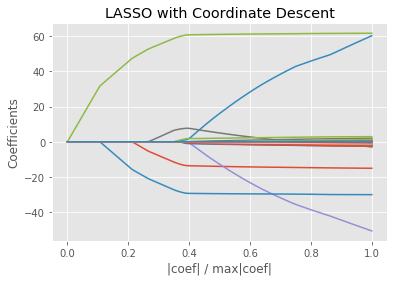

In [142]:
#Fit the lasso path with coordinate descent to the data. 
# Compare the lasso path using coordinate descent with the path using lars. Comment on what you found
from sklearn.linear_model import lasso_path

_, coef_path, _ = lasso_path(X_train_scaled, y_train) #obtain the coefficients

n_cols = coef_path.shape[1] #going to use this to loop over the columns of the lars_lasso_predictions 
    
for i in range(n_cols): #calculate the test mse for each coefficient and print it
    lasso_predictions = X_test @ coef_path[:,i]
    mse = mean_squared_error(y_true=y_test, y_pred = lasso_predictions)
    print("Test MSE for Model_{} :     {}".format(i,mse))

plot_lars(coef_path, title = "LASSO with Coordinate Descent")

For the most part, the plots appear the same! The only noticeable difference is the fact that the intersection of the green and blue lines do not intersect in the "LASSO with Coordinate Descent" plot whereas they do in the LARS path.

**Solution 6.**

In [143]:
# Extract each active set from the lasso path and recompute the restricted OLS for each.  
# Compute and compare the test error for each model.

alphas, active, coef_path_lars = lars_path(X_train_scaled, y_train, method='lasso') #need to store active set

#list for storing restricted OLS MSEs
error_list = []

#list for storing number of variables in the models
num_vars = []

coefs_path_lars_subs = coef_path_lars[:,1:]

for i in range(coefs_path_lars_subs.shape[1]):
    index = np.where(coefs_path_lars_subs[:,i] != 0 )[0] #obtain the indices of which variables we will need to fit restr. OLS
    X_train_scaled_subset = X_train_scaled[:,index] #select the correct variables from the active set during this iteration
    X_test_subset = X_test[:,index]
    restricted_model = LinearRegression(fit_intercept = False).fit(X_train_scaled_subset,y_train) #fit the restr. model
    restricted_preds = restricted_model.predict(X_test_subset) #generate predictions
    mse = mean_squared_error(y_true=y_test, y_pred=restricted_preds)
    error_list.append(mse)
    num_vars.append(X_train_scaled_subset.shape[1])



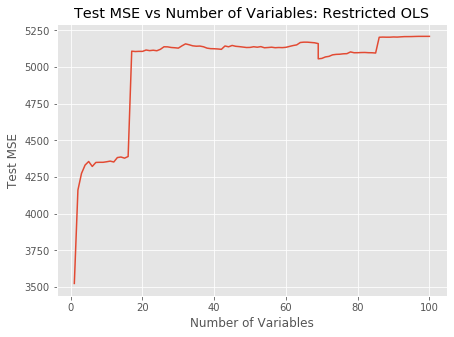

In [144]:
plt.figure(figsize=(7,5))
plt.plot(num_vars, error_list)
plt.xlabel("Number of Variables")
plt.ylabel("Test MSE")
plt.title("Test MSE vs Number of Variables: Restricted OLS")
plt.show()

**Solution 7.**


In [145]:
X_full = np.vstack([X_train, X_test])
y_full = np.hstack([y_train, y_test])

# normalize X
X_full_scaled = normalize(X, norm='l2', axis=0)


In [146]:
import asgl

#create full dataset
#merge train and test labels and normalize
# lambda1 = np.linspace(0,1,num = 1000) #define list of possible hyperparameter values
lambda1 = np.linspace(0,1,num = 1000)
#create the adaptive lasso model


lasso = asgl.TVT(model = 'lm', penalization='lasso',lambda1 = lambda1,
                          error_type='MSE',weight_technique='lasso', parallel = True,
                          random_state=1,
                          train_pct=0.5 ,validate_pct= .25)
lasso = lasso.train_validate_test(x = X_full_scaled,y = y_full)

# output the test error
lasso_error = lasso['test_error']
print("LASSO Test MSE:   {}".format(lasso_error))


LASSO Test MSE:   7.34985744154049


In [147]:


#create the adaptive lasso model
import asgl

lambda1 = np.linspace(0,1,num = 1000) #define list of possible hyperparameter values

#create the adaptive lasso model
adaptive_lasso = asgl.TVT(model='lm', penalization='alasso', lambda1=lambda1, parallel=True,
                     error_type='MSE', random_state=1, weight_technique = 'lasso',
                     train_pct = .50, validate_pct = .25)
adaptive_result = adaptive_lasso.train_validate_test(x=X_train_scaled, y=y_train)

# calculate the test error: use the test error from the adaptive_results output

#first need the list of predictions
# adaptive_lasso_predictions = adaptive_lasso.predict(X_test)

# #calculate the error
# adaptive_error = asgl.error_calculator(y_true= y_test, prediction_list= adaptive_lasso_predictions,
#                                         error_type = "MSE")

print("Adaptive LASSO Test MSE:   {}".format(adaptive_result["test_error"]))




Adaptive LASSO Test MSE:   1.1045033492054344


Based on the test error from each of the optimal models using LASSO and Adaptive LASSO, it is clear that the adaptive LASSO greatly outperforms ordinary LASSO regression by a factor of ~6x. 